# Lab 2: Pie Charts and Donut Charts
Dr. Amr Amin, Ahmed Alqassas  
Autumn 2025  

## Overview
In this tutorial, we will learn how to create **pie charts** and **donut charts** using Python libraries. We'll use the famous **Tips dataset** from Seaborn, which contains information about restaurant bills, tips, and customer characteristics.

### Learning Objectives:
1. Import and explore a real dataset
2. Create informative pie charts for categorical data
3. Build various types of bar charts
4. Understand when to use each chart type
5. Customize visualizations for better presentation

### Prerequisites:
- Basic Python knowledge
- Understanding of pandas DataFrames
- Familiarity with matplotlib basics

## 1. Import Required Libraries

First, let's import all the necessary libraries for our data visualization tutorial:

In [3]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


### Method Explanations:

**Library Imports:**
- `import pandas as pd` - Imports the pandas library for data manipulation and analysis
- `import numpy as np` - Imports NumPy for numerical computations
- `import matplotlib.pyplot as plt` - Imports matplotlib for creating static plots and charts
- `import seaborn as sns` - Imports Seaborn for statistical data visualization

**Style Configuration:**
- `plt.style.use('seaborn-v0_8')` - Sets the overall visual style for matplotlib plots to Seaborn's style
- `sns.set_palette("husl")` - Sets the color palette for Seaborn plots to "husl" (a perceptually uniform color space)
- `plt.rcParams['figure.figsize']` - Sets default figure size for all plots (width, height in inches)
- `plt.rcParams['font.size']` - Sets default font size for all text elements in plots

## 2. Load and Explore the Dataset

The **Tips dataset** is a classic dataset in data science. It contains information about:
- Restaurant bills and tips
- Customer demographics (sex, smoker status)
- Meal timing (day of week, lunch/dinner)
- Party size

Let's load and examine this dataset:

In [4]:
# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

print("Dataset loaded successfully!")
print(f"Dataset shape: {tips.shape}")
print(f"Number of rows: {tips.shape[0]}")
print(f"Number of columns: {tips.shape[1]}")

Dataset loaded successfully!
Dataset shape: (244, 7)
Number of rows: 244
Number of columns: 7


### Method Explanations:

**Dataset Loading:**
- `sns.load_dataset('tips')` - Loads a built-in example dataset from Seaborn library
- `tips.shape` - Returns a tuple (rows, columns) showing the dimensions of the DataFrame
- `tips.shape[0]` - Accesses the first element of the shape tuple (number of rows)
- `tips.shape[1]` - Accesses the second element of the shape tuple (number of columns)

In [5]:
# Display the first few rows to understand the data structure
print("First 10 rows of the dataset:")
tips.head(10)

First 10 rows of the dataset:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


### Method Explanations:

**DataFrame Inspection:**
- `tips.head(10)` - Returns the first 10 rows of the DataFrame for quick data preview
- `.head()` without arguments shows the first 5 rows by default

In [6]:
# Get detailed information about the dataset
print("Dataset Information:")
tips.info()
print("\n" + "="*50)
print("\nDataset Description:")
tips.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Dataset Description:


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Method Explanations:

**DataFrame Analysis:**
- `tips.info()` - Provides a concise summary including data types, non-null counts, and memory usage
- `tips.describe()` - Generates descriptive statistics (count, mean, std, min, max, quartiles) for numerical columns

In [7]:
# Check for missing values
print("Missing values in each column:")
print(tips.isnull().sum())
print("\nGreat! No missing values to handle.")

Missing values in each column:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Great! No missing values to handle.


### Method Explanations:

**Missing Data Check:**
- `tips.isnull()` - Returns a DataFrame of boolean values indicating missing (True) or present (False) values
- `.sum()` - Sums the True values (1) and False values (0) to count missing values per column

In [8]:
# Examine unique values in categorical columns
categorical_columns = ['sex', 'smoker', 'day', 'time']

for col in categorical_columns:
    print(f"\n{col.upper()} - Unique values:")
    print(f"Values: {tips[col].unique()}")
    print(f"Counts: {tips[col].value_counts().to_dict()}")


SEX - Unique values:
Values: ['Female', 'Male']
Categories (2, object): ['Male', 'Female']
Counts: {'Male': 157, 'Female': 87}

SMOKER - Unique values:
Values: ['No', 'Yes']
Categories (2, object): ['Yes', 'No']
Counts: {'No': 151, 'Yes': 93}

DAY - Unique values:
Values: ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
Counts: {'Sat': 87, 'Sun': 76, 'Thur': 62, 'Fri': 19}

TIME - Unique values:
Values: ['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']
Counts: {'Dinner': 176, 'Lunch': 68}


### Method Explanations:

**Categorical Data Analysis:**
- `tips[col].unique()` - Returns an array of unique values in the specified column
- `tips[col].value_counts()` - Counts the frequency of each unique value in the column
- `.to_dict()` - Converts the Series result to a Python dictionary for easier reading

## 3. Pie Charts - Visualizing Categorical Distributions

**Pie charts** are excellent for showing the proportion of different categories in a dataset. They work best when:
- You have a small number of categories (ideally 2-6)
- You want to show parts of a whole
- The categories are mutually exclusive

Let's create several pie charts to explore our data:

### 3.1 Basic Pie Chart - Distribution by Day

Customer distribution by day:
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


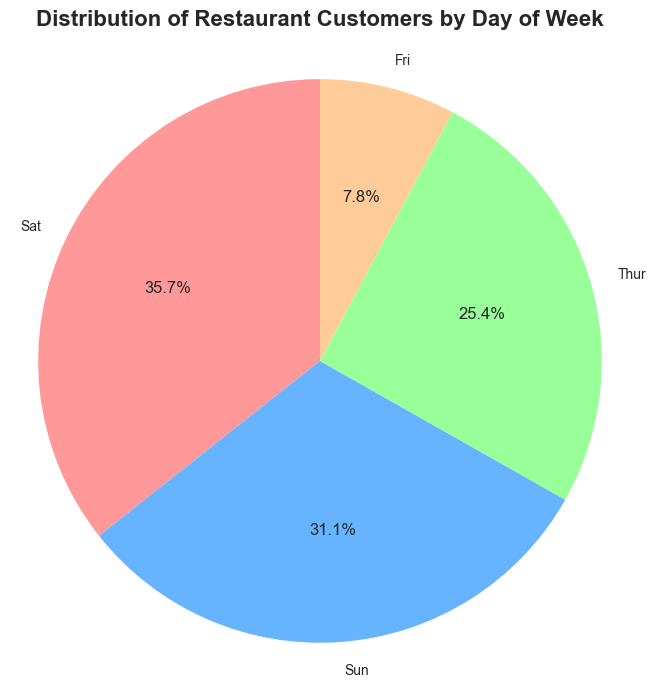


Insight: Most customers visit on Saturday and Sunday (weekend days).


In [9]:
# Create a pie chart showing the distribution of customers by day
plt.figure(figsize=(8, 8))

# Count the occurrences of each day
day_counts = tips['day'].value_counts()
print("Customer distribution by day:")
print(day_counts)

# Create the pie chart
plt.pie(day_counts.values, 
        labels=day_counts.index, 
        autopct='%1.1f%%',  # Show percentages with 1 decimal place
        startangle=90,      # Start the first slice at 90 degrees
        colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])

plt.title('Distribution of Restaurant Customers by Day of Week', 
          fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

print("\nInsight: Most customers visit on Saturday and Sunday (weekend days).")

### Method Explanations:

**Pie Chart Creation:**
- `plt.figure(figsize=(8, 8))` - Creates a new figure with specified width and height in inches
- `tips['day'].value_counts()` - Counts occurrences of each day, returns a Series sorted by count (descending)
- `plt.pie()` - Creates a pie chart with specified data and formatting options
- `autopct='%1.1f%%'` - Formats percentage labels to show 1 decimal place
- `startangle=90` - Rotates the pie chart so the first slice starts at 90 degrees (top)
- `plt.title()` - Adds a title to the plot with specified font properties
- `plt.axis('equal')` - Ensures the pie chart is drawn as a perfect circle
- `plt.show()` - Displays the completed plot

### 3.2 Enhanced Pie Chart - Smoker vs Non-Smoker

Smoker distribution:
smoker
No     151
Yes     93
Name: count, dtype: int64
Percentage of non-smokers: 61.9%
Percentage of smokers: 38.1%


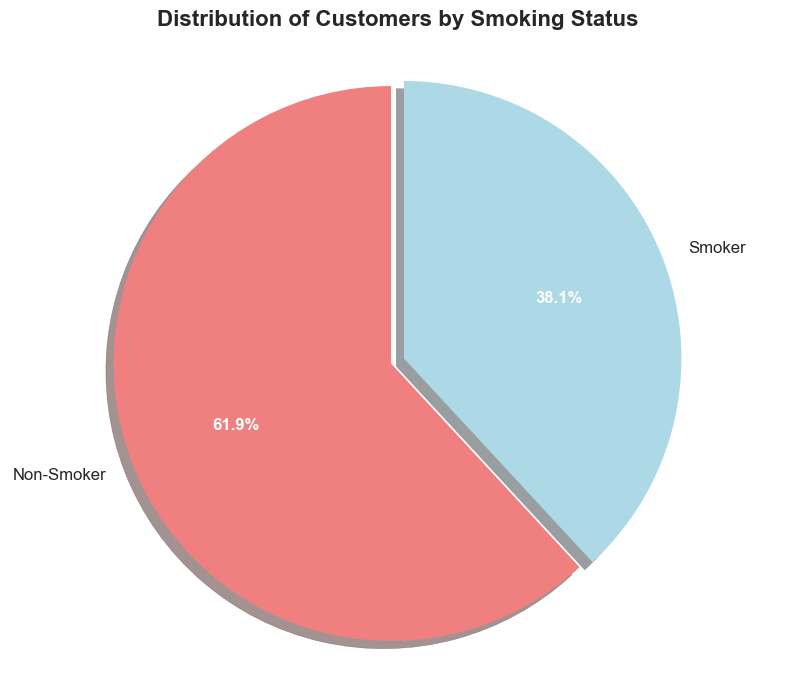


Insight: The majority of restaurant customers are non-smokers.


In [10]:
# Create an enhanced pie chart for smoker distribution
plt.figure(figsize=(10, 8))

smoker_counts = tips['smoker'].value_counts()
print("Smoker distribution:")
print(smoker_counts)
print(f"Percentage of non-smokers: {(smoker_counts['No']/len(tips)*100):.1f}%")
print(f"Percentage of smokers: {(smoker_counts['Yes']/len(tips)*100):.1f}%")

# Enhanced pie chart with explosion and shadow
explode = (0.05, 0)  # Slightly separate the first slice
colors = ['lightcoral', 'lightblue']

wedges, texts, autotexts = plt.pie(smoker_counts.values,
                                  labels=['Non-Smoker', 'Smoker'],
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  explode=explode,
                                  colors=colors,
                                  shadow=True,
                                  textprops={'fontsize': 12})

# Customize the percentage text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Distribution of Customers by Smoking Status', 
          fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.show()

print("\nInsight: The majority of restaurant customers are non-smokers.")

### Method Explanations:

**Enhanced Pie Chart Techniques:**
- `explode = (0.05, 0)` - Creates a tuple to separate specific slices from the center
- `plt.pie()` returns three objects: wedges (slice objects), texts (labels), autotexts (percentages)
- `shadow=True` - Adds a drop shadow effect to make the chart more visually appealing
- `textprops={'fontsize': 12}` - Sets font properties for all text elements
- `autotext.set_color('white')` - Changes the color of percentage text to white
- `autotext.set_fontweight('bold')` - Makes percentage text bold for better visibility

### 3.3 Donut Chart - Gender Distribution

Gender distribution:
sex
Male      157
Female     87
Name: count, dtype: int64


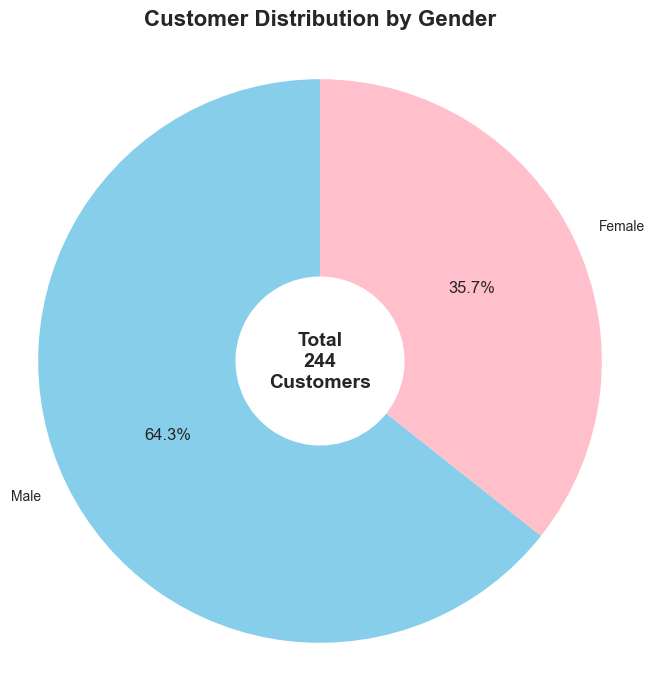


Insight: There are more male customers than female customers in this dataset.


In [11]:
# Create a donut chart (pie chart with a hole in the middle)
fig, ax = plt.subplots(figsize=(8, 8))

sex_counts = tips['sex'].value_counts()
print("Gender distribution:")
print(sex_counts)

# Create donut chart
wedges, texts, autotexts = ax.pie(sex_counts.values,
                                 labels=['Male', 'Female'],
                                 autopct='%1.1f%%',
                                 startangle=90,
                                 colors=['skyblue', 'pink'],
                                 wedgeprops={'width': 0.7})  # Creates the donut effect

# Add center text
ax.text(0, 0, f'Total\n{len(tips)}\nCustomers', 
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontweight='bold')

plt.title('Customer Distribution by Gender', 
          fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.show()

print("\nInsight: There are more male customers than female customers in this dataset.")

### Method Explanations:

**Donut Chart Creation:**
- `fig, ax = plt.subplots()` - Creates a figure and axis object for more precise control
- `wedgeprops={'width': 0.7}` - Sets the width of the pie wedges (0.7 creates the donut hole)
- `ax.text(0, 0, ...)` - Adds text at the center coordinates (0, 0) of the donut
- `horizontalalignment='center'` - Centers text horizontally
- `verticalalignment='center'` - Centers text vertically
- The combination creates a donut chart with informative center text

## 4. Bar Charts - Comparing Categories and Values

**Bar charts** are versatile and excellent for:
- Comparing quantities across categories
- Showing changes over time
- Displaying both categorical counts and numerical aggregations
- Handling larger numbers of categories than pie charts

Let's explore different types of bar charts:

### 4.1 Simple Bar Chart - Count of Customers by Day

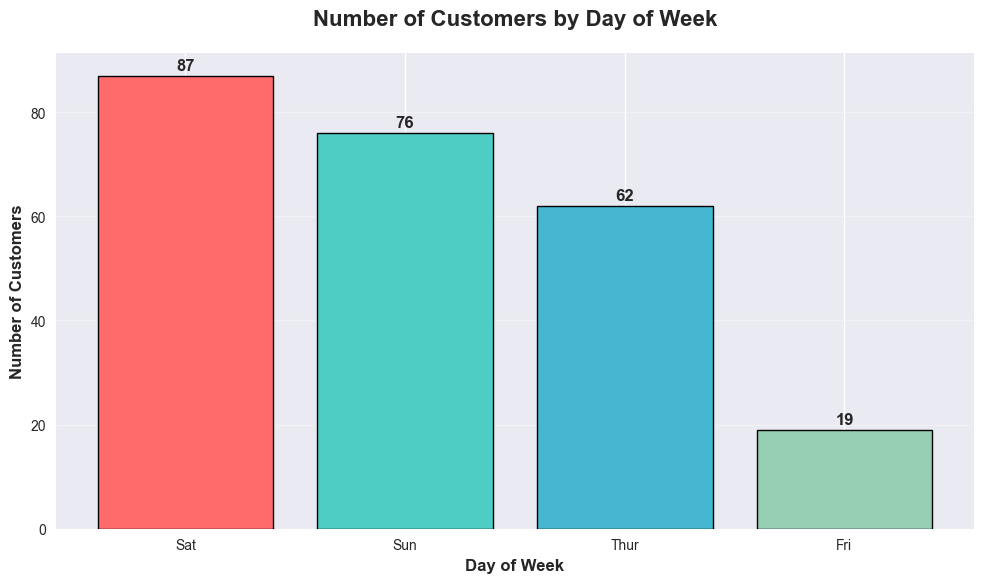


Insight: Saturday has the highest number of customers, followed by Sunday.


In [12]:
# Create a simple bar chart showing customer counts by day
plt.figure(figsize=(10, 6))

day_counts = tips['day'].value_counts()

# Create bar chart
bars = plt.bar(day_counts.index, day_counts.values, 
               color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4'],
               edgecolor='black', linewidth=1)

# Customize the chart
plt.title('Number of Customers by Day of Week', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Day of Week', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInsight: Saturday has the highest number of customers, followed by Sunday.")

### Method Explanations:

**Bar Chart Creation and Customization:**
- `plt.bar()` - Creates vertical bars with specified x-positions, heights, and styling
- `edgecolor='black'` - Adds black borders around each bar
- `linewidth=1` - Sets the width of the bar borders
- `bar.get_height()` - Returns the height value of each bar for label placement
- `bar.get_x() + bar.get_width()/2.` - Calculates the center x-position of each bar
- `plt.text()` - Adds text labels at specified coordinates with alignment options
- `ha='center', va='bottom'` - Sets horizontal and vertical text alignment
- `plt.grid(axis='y', alpha=0.3)` - Adds horizontal grid lines with transparency

### 4.2 Bar Chart with Aggregated Data - Average Tip by Day

Average tip by day:
Sun: $3.26
Sat: $2.99
Thur: $2.77
Fri: $2.73


C:\Users\qassas\AppData\Local\Temp\ipykernel_3308\1450451621.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_by_day = tips.groupby('day')['tip'].mean().sort_values(ascending=False)


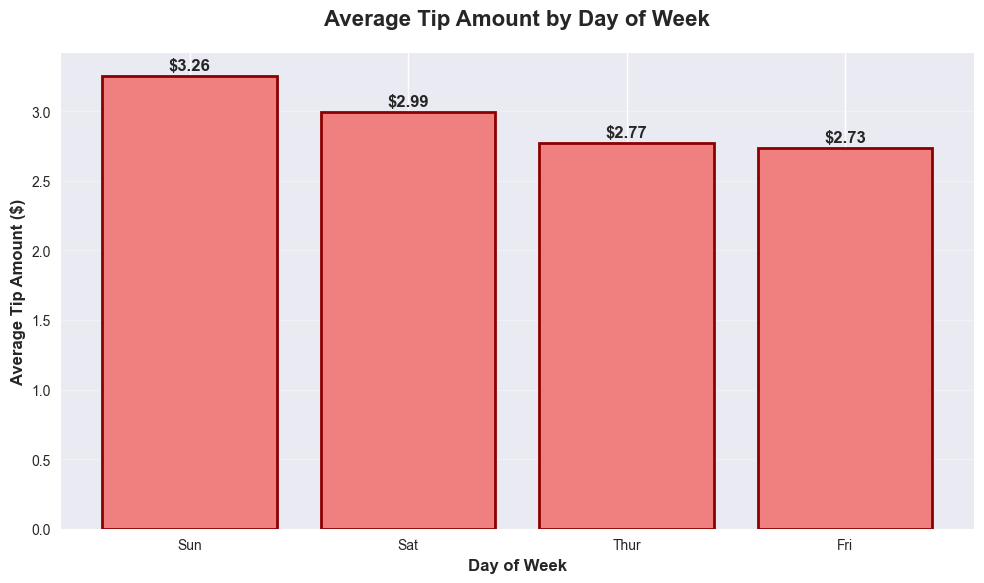


Insight: Sunday has the highest average tip, while Thursday has the lowest.


In [13]:
# Calculate average tip by day
avg_tip_by_day = tips.groupby('day')['tip'].mean().sort_values(ascending=False)

print("Average tip by day:")
for day, avg_tip in avg_tip_by_day.items():
    print(f"{day}: ${avg_tip:.2f}")

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_tip_by_day.index, avg_tip_by_day.values, 
               color='lightcoral', edgecolor='darkred', linewidth=2)

plt.title('Average Tip Amount by Day of Week', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Day of Week', fontsize=12, fontweight='bold')
plt.ylabel('Average Tip Amount ($)', fontsize=12, fontweight='bold')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'${height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInsight: Sunday has the highest average tip, while Thursday has the lowest.")

### Method Explanations:

**Data Aggregation and Sorting:**
- `tips.groupby('day')['tip'].mean()` - Groups data by day and calculates mean tip for each group
- `.sort_values(ascending=False)` - Sorts the results in descending order (highest to lowest)
- This combination allows us to see which days have the highest average tips
- The bar chart then visualizes this aggregated and sorted data

### 4.3 Horizontal Bar Chart - Total Bill by Time

Average total bill by meal time:
Lunch: $17.17
Dinner: $20.80


C:\Users\qassas\AppData\Local\Temp\ipykernel_3308\951820436.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_bill_by_time = tips.groupby('time')['total_bill'].mean()


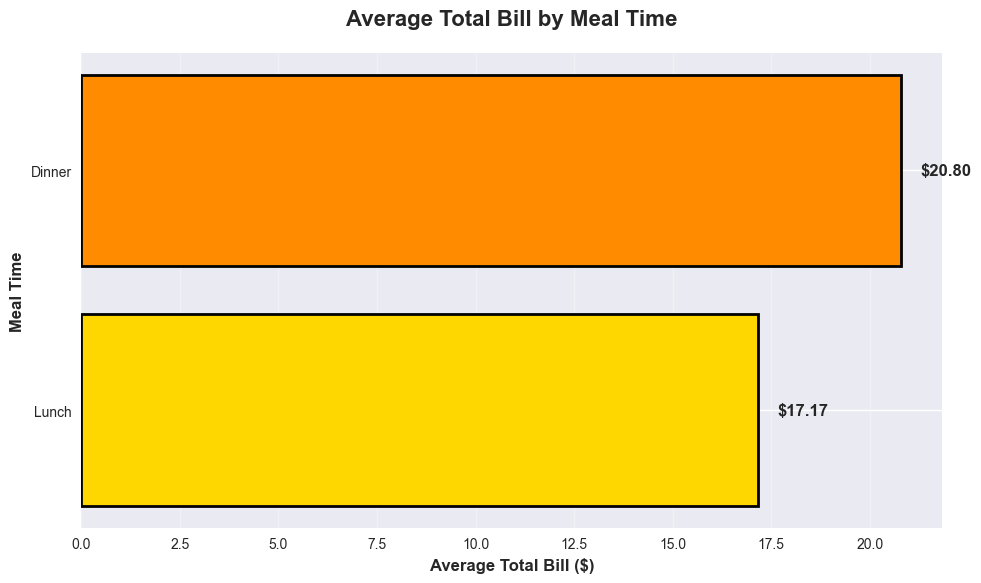


Insight: Dinner bills are significantly higher than lunch bills on average.


In [14]:
# Calculate average total bill by time (lunch vs dinner)
avg_bill_by_time = tips.groupby('time')['total_bill'].mean()

print("Average total bill by meal time:")
for time, avg_bill in avg_bill_by_time.items():
    print(f"{time}: ${avg_bill:.2f}")

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(avg_bill_by_time.index, avg_bill_by_time.values, 
                color=['gold', 'darkorange'], edgecolor='black', linewidth=2)

plt.title('Average Total Bill by Meal Time', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Average Total Bill ($)', fontsize=12, fontweight='bold')
plt.ylabel('Meal Time', fontsize=12, fontweight='bold')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2.,
             f'${width:.2f}', ha='left', va='center', fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInsight: Dinner bills are significantly higher than lunch bills on average.")

### Method Explanations:

**Horizontal Bar Charts:**
- `plt.barh()` - Creates horizontal bars instead of vertical bars
- The x and y parameters are swapped compared to `plt.bar()`
- `bar.get_y() + bar.get_height()/2.` - Calculates center y-position for horizontal bars
- `ha='left', va='center'` - Aligns text to the left and center vertically for horizontal bars
- Horizontal bars are useful when category names are long or when comparing magnitudes

### 4.4 Grouped Bar Chart - Tips by Gender and Smoker Status

Average tip by gender and smoker status:
smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519


C:\Users\qassas\AppData\Local\Temp\ipykernel_3308\2085384900.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_gender_smoker = tips.groupby(['sex', 'smoker'])['tip'].mean().unstack()


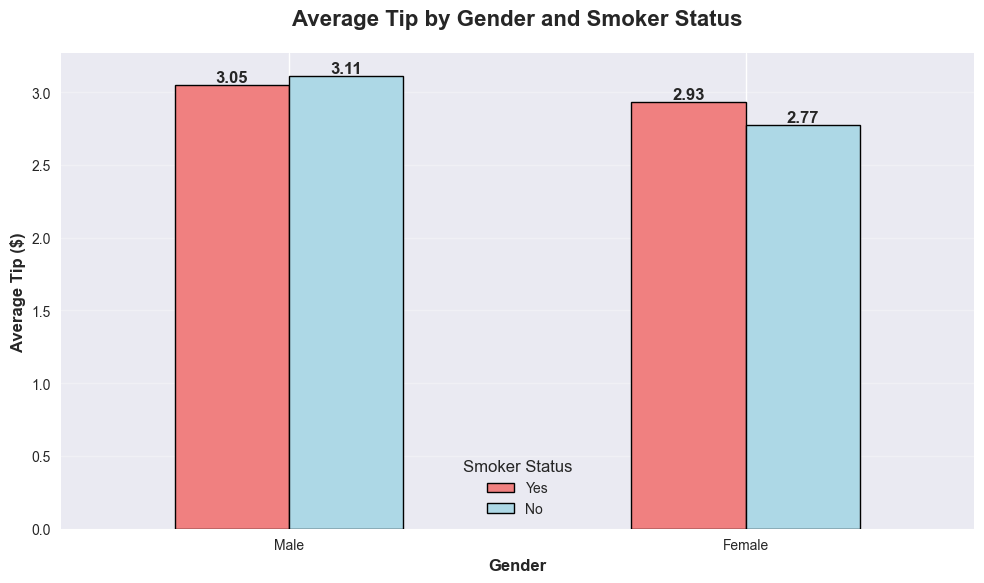


Insight: Male non-smokers tend to give the highest tips on average.


In [15]:
# Create a grouped bar chart showing average tips by gender and smoker status
tip_by_gender_smoker = tips.groupby(['sex', 'smoker'])['tip'].mean().unstack()

print("Average tip by gender and smoker status:")
print(tip_by_gender_smoker)

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
tip_by_gender_smoker.plot(kind='bar', ax=ax, 
                         color=['lightcoral', 'lightblue'],
                         edgecolor='black', linewidth=1)

plt.title('Average Tip by Gender and Smoker Status', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Gender', fontsize=12, fontweight='bold')
plt.ylabel('Average Tip ($)', fontsize=12, fontweight='bold')
plt.legend(title='Smoker Status', title_fontsize=12, fontsize=10)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nInsight: Male non-smokers tend to give the highest tips on average.")

### Method Explanations:

**Grouped Bar Charts:**
- `tips.groupby(['sex', 'smoker'])['tip'].mean()` - Groups by two variables simultaneously
- `.unstack()` - Pivots the inner grouping level (smoker) to become columns
- `plot(kind='bar')` - Uses pandas' built-in plotting functionality to create grouped bars
- `ax.containers` - Accesses the bar containers for adding labels
- `ax.bar_label(container, fmt='%.2f')` - Automatically adds formatted labels to all bars
- This creates side-by-side bars for easy comparison across multiple categories

### 4.5 Stacked Bar Chart - Customer Distribution by Day and Time

Customer counts by day and meal time:
time  Lunch  Dinner
day                
Thur     61       1
Fri       7      12
Sat       0      87
Sun       0      76


C:\Users\qassas\AppData\Local\Temp\ipykernel_3308\242879320.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_time_counts = tips.groupby(['day', 'time']).size().unstack(fill_value=0)


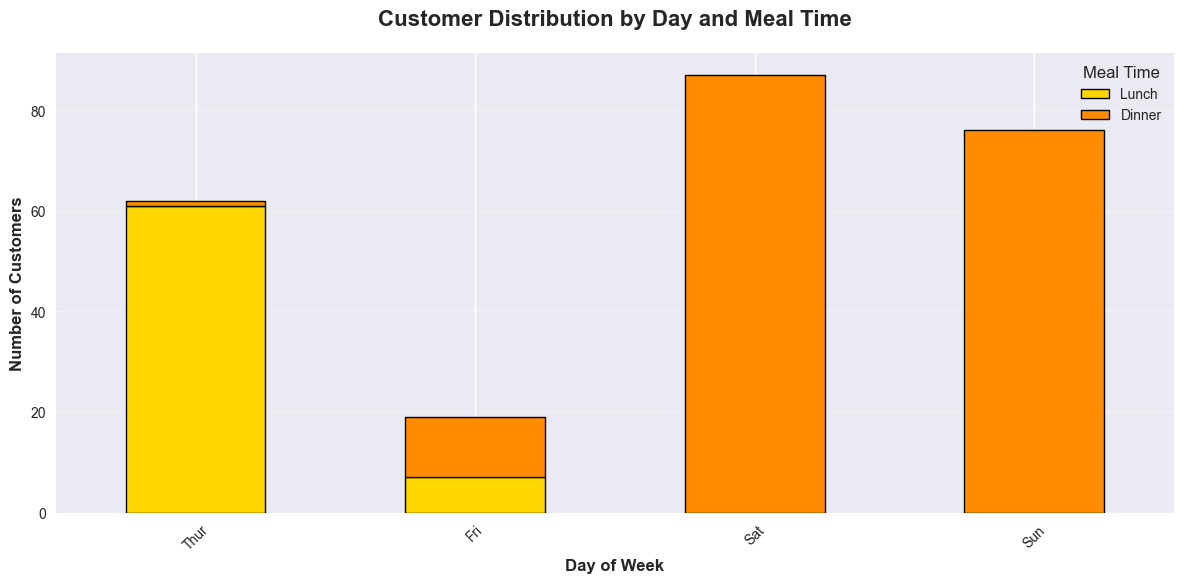


Insight: Most customers come for dinner, and lunch is only served on certain days.


In [16]:
# Create a stacked bar chart showing customer distribution by day and meal time
day_time_counts = tips.groupby(['day', 'time']).size().unstack(fill_value=0)

print("Customer counts by day and meal time:")
print(day_time_counts)

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
day_time_counts.plot(kind='bar', stacked=True, ax=ax,
                    color=['gold', 'darkorange'],
                    edgecolor='black', linewidth=1)

plt.title('Customer Distribution by Day and Meal Time', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Day of Week', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')
plt.legend(title='Meal Time', title_fontsize=12, fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nInsight: Most customers come for dinner, and lunch is only served on certain days.")

### Method Explanations:

**Stacked Bar Charts:**
- `tips.groupby(['day', 'time']).size()` - Groups by two variables and counts occurrences
- `.unstack(fill_value=0)` - Pivots data and fills missing combinations with 0
- `plot(kind='bar', stacked=True)` - Creates stacked bars where categories are stacked on top of each other
- `stacked=True` parameter makes bars stack vertically instead of appearing side-by-side
- Useful for showing both totals and composition within each category

## 5. Advanced Visualization - Subplots for Comprehensive Analysis

C:\Users\qassas\AppData\Local\Temp\ipykernel_3308\4070896949.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_by_day = tips.groupby('day')['tip'].mean()


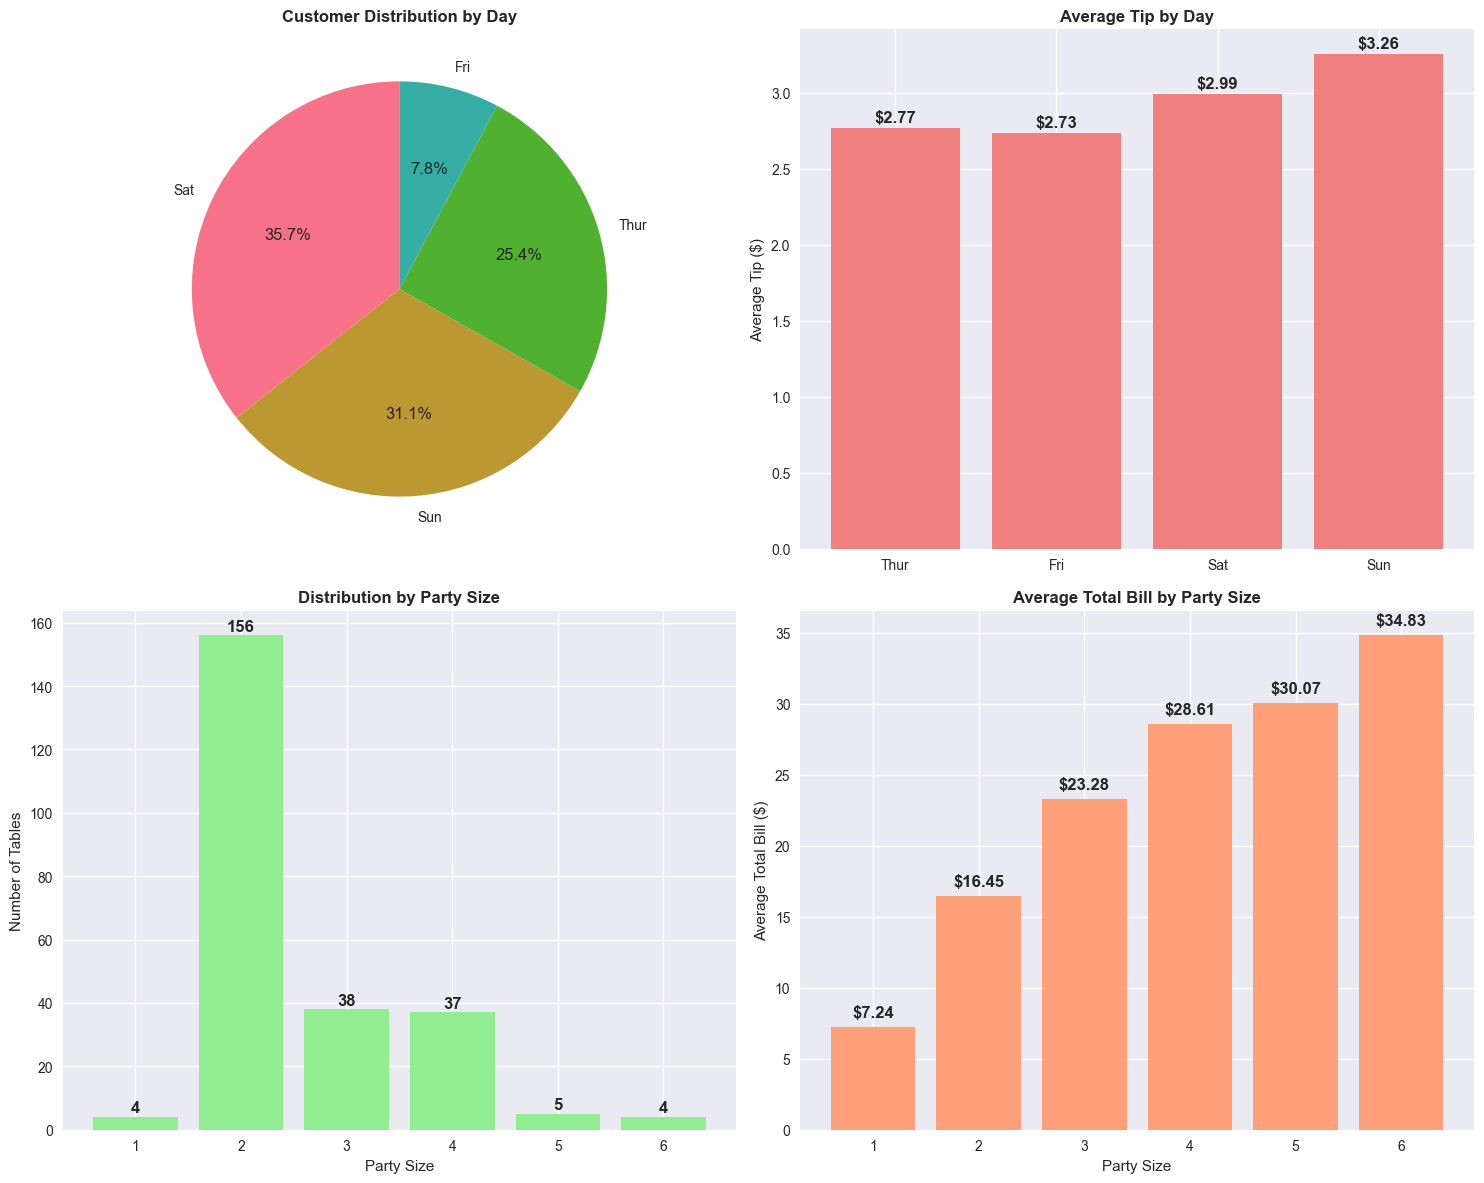


Comprehensive Analysis Insights:
1. Weekends (Sat-Sun) have the most customers
2. Sunday has the highest average tips
3. Most parties are size 2 (couples)
4. Larger parties tend to have higher total bills


In [17]:
# Create a comprehensive visualization with multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Subplot 1: Pie chart - Day distribution
day_counts = tips['day'].value_counts()
ax1.pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Customer Distribution by Day', fontweight='bold')

# Subplot 2: Bar chart - Average tip by day
avg_tip_by_day = tips.groupby('day')['tip'].mean()
bars2 = ax2.bar(avg_tip_by_day.index, avg_tip_by_day.values, color='lightcoral')
ax2.set_title('Average Tip by Day', fontweight='bold')
ax2.set_ylabel('Average Tip ($)')
# Add value labels
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'${height:.2f}', ha='center', va='bottom', fontweight='bold')

# Subplot 3: Bar chart - Party size distribution
size_counts = tips['size'].value_counts().sort_index()
bars3 = ax3.bar(size_counts.index, size_counts.values, color='lightgreen')
ax3.set_title('Distribution by Party Size', fontweight='bold')
ax3.set_xlabel('Party Size')
ax3.set_ylabel('Number of Tables')
# Add value labels
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Subplot 4: Bar chart - Average bill by party size
avg_bill_by_size = tips.groupby('size')['total_bill'].mean()
bars4 = ax4.bar(avg_bill_by_size.index, avg_bill_by_size.values, color='lightsalmon')
ax4.set_title('Average Total Bill by Party Size', fontweight='bold')
ax4.set_xlabel('Party Size')
ax4.set_ylabel('Average Total Bill ($)')
# Add value labels
for bar in bars4:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'${height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nComprehensive Analysis Insights:")
print("1. Weekends (Sat-Sun) have the most customers")
print("2. Sunday has the highest average tips")
print("3. Most parties are size 2 (couples)")
print("4. Larger parties tend to have higher total bills")

### Method Explanations:

**Subplot Creation and Management:**
- `plt.subplots(2, 2, figsize=(15, 12))` - Creates a 2x2 grid of subplots with specified figure size
- `fig, ((ax1, ax2), (ax3, ax4))` - Unpacks the figure and axes objects into individual variables
- `ax1.pie()` - Creates a pie chart on the first subplot (top-left)
- `ax2.bar()` - Creates a bar chart on the second subplot (top-right)
- Each `ax` object allows independent customization of its respective subplot
- `plt.tight_layout()` - Automatically adjusts spacing between subplots to prevent overlap
- This approach allows multiple related visualizations to be displayed together for comprehensive analysis

## 6. Best Practices and Guidelines

### When to Use Pie Charts:
**Good for:**
- Showing parts of a whole (percentages)
- 2-6 categories maximum
- When exact values are less important than proportions
- Categorical data with clear distinctions

**Avoid when:**
- You have many categories (>6)
- Comparing similar-sized segments
- Showing trends over time
- Precise comparison is needed

### When to Use Bar Charts:
**Good for:**
- Comparing quantities across categories
- Showing rankings or ordered data
- Displaying both counts and calculated values
- Handling many categories
- Time series data

**Always remember:**
- Start y-axis at zero for accurate comparison
- Use consistent colors unless highlighting specific data
- Add value labels when space permits
- Choose horizontal bars for long category names

## 7. Summary Statistics and Key Insights

Let's summarize our key findings from the visualization analysis:

In [18]:
# Generate comprehensive summary statistics
print("="*60)
print("           TIPS DATASET ANALYSIS SUMMARY")
print("="*60)

print(f"\nDATASET OVERVIEW:")
print(f"   • Total records: {len(tips):,}")
print(f"   • Date range: Restaurant data")
print(f"   • Categories: {len(tips.columns)} variables")

print(f"\nFINANCIAL INSIGHTS:")
print(f"   • Average total bill: ${tips['total_bill'].mean():.2f}")
print(f"   • Average tip: ${tips['tip'].mean():.2f}")
print(f"   • Average tip percentage: {(tips['tip']/tips['total_bill']*100).mean():.1f}%")
print(f"   • Highest bill: ${tips['total_bill'].max():.2f}")
print(f"   • Lowest bill: ${tips['total_bill'].min():.2f}")

print(f"\nCUSTOMER DEMOGRAPHICS:")
print(f"   • Male customers: {len(tips[tips['sex']=='Male'])} ({len(tips[tips['sex']=='Male'])/len(tips)*100:.1f}%)")
print(f"   • Female customers: {len(tips[tips['sex']=='Female'])} ({len(tips[tips['sex']=='Female'])/len(tips)*100:.1f}%)")
print(f"   • Smokers: {len(tips[tips['smoker']=='Yes'])} ({len(tips[tips['smoker']=='Yes'])/len(tips)*100:.1f}%)")
print(f"   • Non-smokers: {len(tips[tips['smoker']=='No'])} ({len(tips[tips['smoker']=='No'])/len(tips)*100:.1f}%)")

print(f"\nTEMPORAL PATTERNS:")
busiest_day = tips['day'].value_counts().index[0]
print(f"   • Busiest day: {busiest_day} ({tips['day'].value_counts().iloc[0]} customers)")
best_tip_day = tips.groupby('day')['tip'].mean().idxmax()
print(f"   • Best tipping day: {best_tip_day} (${tips.groupby('day')['tip'].mean().max():.2f} average)")
print(f"   • Lunch customers: {len(tips[tips['time']=='Lunch'])}")
print(f"   • Dinner customers: {len(tips[tips['time']=='Dinner'])}")

print(f"\nPARTY SIZE INSIGHTS:")
avg_party_size = tips['size'].mean()
most_common_size = tips['size'].mode().iloc[0]
print(f"   • Average party size: {avg_party_size:.1f} people")
print(f"   • Most common party size: {most_common_size} people")
print(f"   • Party size range: {tips['size'].min()}-{tips['size'].max()} people")

print("\n" + "="*60)
print("Analysis completed successfully!")
print("="*60)

           TIPS DATASET ANALYSIS SUMMARY

DATASET OVERVIEW:
   • Total records: 244
   • Date range: Restaurant data
   • Categories: 7 variables

FINANCIAL INSIGHTS:
   • Average total bill: $19.79
   • Average tip: $3.00
   • Average tip percentage: 16.1%
   • Highest bill: $50.81
   • Lowest bill: $3.07

CUSTOMER DEMOGRAPHICS:
   • Male customers: 157 (64.3%)
   • Female customers: 87 (35.7%)
   • Smokers: 93 (38.1%)
   • Non-smokers: 151 (61.9%)

TEMPORAL PATTERNS:
   • Busiest day: Sat (87 customers)
   • Best tipping day: Sun ($3.26 average)
   • Lunch customers: 68
   • Dinner customers: 176

PARTY SIZE INSIGHTS:
   • Average party size: 2.6 people
   • Most common party size: 2 people
   • Party size range: 1-6 people

Analysis completed successfully!


C:\Users\qassas\AppData\Local\Temp\ipykernel_3308\3910238203.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  best_tip_day = tips.groupby('day')['tip'].mean().idxmax()
C:\Users\qassas\AppData\Local\Temp\ipykernel_3308\3910238203.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(f"   • Best tipping day: {best_tip_day} (${tips.groupby('day')['tip'].mean().max():.2f} average)")


### Method Explanations:

**Statistical Analysis Methods:**
- `len(tips)` - Returns the number of rows (records) in the DataFrame
- `tips['total_bill'].mean()` - Calculates the arithmetic mean of the total_bill column
- `tips['total_bill'].max()` - Returns the maximum value in the total_bill column
- `tips['total_bill'].min()` - Returns the minimum value in the total_bill column
- `tips[tips['sex']=='Male']` - Filters DataFrame to show only rows where sex equals 'Male'
- `tips['day'].value_counts().index[0]` - Gets the index (day name) of the most frequent day
- `tips['day'].value_counts().iloc[0]` - Gets the count value of the most frequent day
- `tips.groupby('day')['tip'].mean()` - Groups data by day and calculates mean tip for each day
- `.idxmax()` - Returns the index (day) with the maximum mean tip value
- `tips['size'].mode().iloc[0]` - Finds the most frequently occurring party size

## 8. Conclusion and Next Steps

Congratulations! You've successfully completed this data visualization tutorial. Here's what you've learned:

### What You've Accomplished:
1. **Data Loading**: Imported and explored a real-world dataset
2. **Pie Charts**: Created various pie chart styles for categorical data
3. **Bar Charts**: Built multiple types of bar charts for different use cases
4. **Customization**: Added colors, labels, and styling to improve readability
5. **Analysis**: Extracted meaningful insights from visualizations

### Next Steps for Learning:
1. **Try other datasets**: Explore Seaborn's other built-in datasets (iris, flights, etc.)
2. **Advanced charts**: Learn about histograms, box plots, and scatter plots
3. **Interactive visualizations**: Explore Plotly for interactive charts
4. **Statistical plots**: Use Seaborn for statistical visualizations
5. **Dashboard creation**: Combine multiple charts into dashboards

### Key Takeaways:
- **Choose the right chart**: Pie charts for proportions, bar charts for comparisons
- **Keep it simple**: Clear titles, labels, and colors improve understanding
- **Tell a story**: Every chart should answer a specific question
- **Iterate and improve**: Start simple, then add enhancements

### Additional Resources:
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)
- [Pandas Visualization](https://pandas.pydata.org/docs/user_guide/visualization.html)

qassas.ahmed@mau.edu.eg